In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.graph_objects as go


In [131]:
df = pd.read_csv('olist_complete.csv')


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  payment_sequential            

In [133]:
df.drop(columns="review_comment_title", inplace=True)

In [134]:
df.drop(columns="review_comment_message", inplace=True)

In [135]:
df.isnull().sum()   

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         997
review_score                      997
review_creation_date              997
review_answer_timestamp           997
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_cate

In [136]:
#df= df[df['order_approved_at'].notna()]
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'],errors='coerce' )
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'],errors='coerce' )
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'],errors='coerce' )
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'],errors='coerce' )
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'],errors='coerce' )
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'],errors='coerce' )
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'],errors='coerce' )
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'],errors='coerce' )
df["review_answer_timestamp"] = pd.to_datetime(df["review_answer_timestamp"], errors='coerce') 
df["review_creation_date"] = pd.to_datetime(df["review_creation_date"], errors='coerce')
#df["shipping_limit_date"] = pd.to_datetime(df["shipping_limit_date"], errors='coerce')









In [137]:
df['payment_value'] = df['payment_value'].astype(float, errors='ignore')
df['freight_value'] = df['freight_value'].astype(float, errors='ignore')
df['price'] = df['price'].astype(float, errors='ignore')
df["product_weight_g"] = df["product_weight_g"].astype('Int64', errors='ignore')
df["product_length_cm"] = df["product_length_cm"].astype('Int64', errors='ignore')
df["product_height_cm"] = df["product_height_cm"].astype('Int64', errors='ignore')
df["product_width_cm"] = df["product_width_cm"].astype('Int64', errors='ignore')
df["payment_installments"] = df["payment_installments"].astype('Int64', errors='ignore')   
df["payment_sequential"] = df["payment_sequential"].astype('Int64', errors='ignore')
df["product_photos_qty"] = df["product_photos_qty"].astype('Int64', errors='ignore')
df["geolocation_zip_code_prefix"] = df["geolocation_zip_code_prefix"].astype('Int64', errors='ignore')
df["geolocation_lat"] = df["geolocation_lat"].astype("int64", errors='ignore')
df["geolocation_lng"] = df["geolocation_lng"].astype("int64", errors='ignore')





In [138]:
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype("int64", errors='ignore')


In [139]:
df.dropna(subset=["product_id"], inplace=True)


In [140]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         978
review_score                      978
review_creation_date              978
review_answer_timestamp           978
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_cate

In [141]:
df[["payment_sequential", "payment_value","payment_installments","payment_type"]].isnull().sum()


payment_sequential      3
payment_value           3
payment_installments    3
payment_type            3
dtype: int64

In [142]:
missing_orders = df[df['payment_installments'].isna()]['order_status'].value_counts()
df[df["payment_value"].isin(missing_orders)]
   


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
76573,c98632bdc4c3bd2066cdea237cf8f468,024676cef113f6c81db6c5b8d29e5ee9,8290,sao paulo,SP,1d9a9731b9c10fc9cba74e6f74782e8b,delivered,2018-05-01 14:30:35,2018-05-01 14:55:16,2018-05-02 15:05:00,...,36,36,20,3187.0,sao paulo,SP,home_construction,8290,-23.553642,-46.452661


In [143]:
df.dropna(subset="payment_value", inplace=True)


In [144]:
df['review_id'] = df['review_id'].fillna('No_Review_Submited')
df['review_score'] = df['review_score'].fillna(0)  # Or "Not Rated"
df['review_creation_date'] = df['review_creation_date'].fillna('No_Date')
df['review_answer_timestamp'] = df['review_answer_timestamp'].fillna('No_Timestamp_Record')


In [145]:
missing_order_items = df[df['order_item_id'].isna()]['order_id'].unique()
print(len(missing_order_items), "orders with no items")


0 orders with no items


In [146]:
df = df.dropna(subset=['order_item_id'])


In [147]:
missing_products = df[df['product_category_name'].isna()]['product_id'].unique()
print(len(missing_products, ), "products with no category")


610 products with no category


In [148]:
df['product_category_name'].fillna('unknown')


0              moveis_escritorio
1          utilidades_domesticas
2              moveis_escritorio
3              moveis_escritorio
4                  casa_conforto
                   ...          
119138    livros_interesse_geral
119139             esporte_lazer
119140              beleza_saude
119141        relogios_presentes
119142                perfumaria
Name: product_category_name, Length: 118307, dtype: object

In [149]:

english_map = {
    "beleza_saude": "health_beauty",
    "informatica_acessorios": "computers_accessories",
    "automotivo": "auto",
    "cama_mesa_banho": "bed_bath_table",
    "moveis_decoracao": "furniture_decor",
    "esporte_lazer": "sports_leisure",
    "perfumaria": "perfumery",
    "utilidades_domesticas": "housewares",
    "telefonia": "telephony",
    "relogios_presentes": "watches_gifts",
    "alimentos_bebidas": "food_drink",
    "bebes": "baby",
    "papelaria": "stationery",
    "tablets_impressao_imagem": "tablets_printing_image",
    "brinquedos": "toys",
    "telefonia_fixa": "fixed_telephony",
    "ferramentas_jardim": "garden_tools",
    "fashion_bolsas_e_acessorios": "fashion_bags_accessories",
    "eletroportateis": "small_appliances",
    "consoles_games": "consoles_games",
    "audio": "audio",
    "fashion_calcados": "fashion_shoes",
    "cool_stuff": "cool_stuff",
    "malas_acessorios": "luggage_accessories",
    "climatizacao": "air_conditioning",
    "construcao_ferramentas_construcao": "construction_tools_construction",
    "moveis_cozinha_area_de_servico_jantar_e_jardim": "kitchen_dining_laundry_garden_furniture",
    "construcao_ferramentas_jardim": "costruction_tools_garden",
    "fashion_roupa_masculina": "fashion_male_clothing",
    "pet_shop": "pet_shop",
    "moveis_escritorio": "office_furniture",
    "market_place": "market_place",
    "eletronicos": "electronics",
    "eletrodomesticos": "home_appliances",
    "artigos_de_festas": "party_supplies",
    "casa_conforto": "home_confort",
    "construcao_ferramentas_ferramentas": "costruction_tools_tools",
    "agro_industria_e_comercio": "agro_industry_and_commerce",
    "moveis_colchao_e_estofado": "furniture_mattress_and_upholstery",
    "livros_tecnicos": "books_technical",
    "casa_construcao": "home_construction",
    "instrumentos_musicais": "musical_instruments",
    "moveis_sala": "furniture_living_room",
    "construcao_ferramentas_iluminacao": "construction_tools_lights",
    "industria_comercio_e_negocios": "industry_commerce_and_business",
    "alimentos": "food",
    "artes": "art",
    "moveis_quarto": "furniture_bedroom",
    "livros_interesse_geral": "books_general_interest",
    "construcao_ferramentas_seguranca": "construction_tools_safety",
    "fashion_underwear_e_moda_praia": "fashion_underwear_beach",
    "fashion_esporte": "fashion_sport",
    "sinalizacao_e_seguranca": "signaling_and_security",
    "pcs": "computers",
    "artigos_de_natal": "christmas_supplies",
    "fashion_roupa_feminina": "fashio_female_clothing",
    "eletrodomesticos_2": "home_appliances_2",
    "livros_importados": "books_imported",
    "bebidas": "drinks",
    "cine_foto": "cine_photo",
    "la_cuisine": "la_cuisine",
    "musica": "music",
    "casa_conforto_2": "home_comfort_2",
    "portateis_casa_forno_e_cafe": "small_appliances_home_oven_and_coffee",
    "cds_dvds_musicais": "cds_dvds_musicals",
    "dvds_blu_ray": "dvds_blu_ray",
    "flores": "flowers",
    "artes_e_artesanato": "arts_and_craftmanship",
    "fraldas_higiene": "diapers_and_hygiene",
    "fashion_roupa_infanto_juvenil": "fashion_childrens_clothes",
    "seguros_e_servicos": "security_and_services"
}

df['product_category_name_english'] = df.apply(
    lambda row: english_map.get(row['product_category_name_english'], 'unknown') if pd.isna(row['product_category_name_english']) else row['product_category_name_english'],
    axis=1
)


In [150]:
df['geolocation_zip_code_prefix'] = df['geolocation_zip_code_prefix'].fillna(df['geolocation_zip_code_prefix'].mode()[0])
df['geolocation_lat'] = df['geolocation_lat'].fillna(df['geolocation_lat'].median())
df['geolocation_lng'] = df['geolocation_lng'].fillna(df['geolocation_lng'].median())


In [151]:
df['geolocation_zip_code_prefix'] = df['geolocation_zip_code_prefix'].abs()
df['geolocation_lat'] = df['geolocation_lat'].abs()
df['geolocation_lng'] = df['geolocation_lng'].abs()


In [152]:
df["product_name_lenght"] = df["product_name_lenght"].fillna(df["product_name_lenght"].median())
df["product_description_lenght"] = df["product_description_lenght"].fillna(df["product_description_lenght"].median())
df["product_photos_qty"] = df["product_photos_qty"].fillna(df["product_photos_qty"].mode()[0])
df["product_weight_g"] = df["product_weight_g"].fillna(df["product_weight_g"].median())
df["product_length_cm"] = df["product_length_cm"].fillna(df["product_length_cm"].median())
df["product_height_cm"] = df["product_height_cm"].fillna(df["product_height_cm"].median())
df["product_width_cm"] = df["product_width_cm"].fillna(df["product_width_cm"].median())

In [153]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_cate

Detecting outliers 

In [154]:
def remove_outliers_iqr(df, cols,multiplier=1.5, max_outliers_col=2):
    outliers_flags = pd.DataFrame(index=df.index)
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        outliers_flags[col] = ~df[col].between(lower_bound, upper_bound)
    outliers_count = outliers_flags.sum(axis = 1)
    df = df[outliers_count <= max_outliers_col]
    return df, outliers_count
    

In [155]:
numeric_cols = [
    'product_weight_g', 'product_length_cm', 'product_height_cm',
    'product_width_cm', 'price', 'freight_value', 'payment_value'
]

df_cleaned, outliers_count = remove_outliers_iqr(
    df, numeric_cols, multiplier=1.5, max_outliers_col=2
)

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)
print("Rows removed:", df.shape[0] - df_cleaned.shape[0])


Original shape: (118307, 41)
Cleaned shape: (110845, 41)
Rows removed: 7462


Exploratory Data Analysis (EDA) and Visualization

1.Which customers made the most purchases (top 5)

In [156]:
df_cleaned.shape

(110845, 41)

In [157]:
customer_purchased_total= df_cleaned.groupby('customer_unique_id')['order_id'].nunique().reset_index(0)
customer_purchased_total.rename(columns={'order_id': 'total_orders'}, inplace=True)
top_customers= customer_purchased_total.sort_values(by="total_orders",ascending=False).head(5)
top_customers 

,customer_unique_id,total_orders
49409,8d50f5eadf50201ccdcedfb9e2ac8455,16
21905,3e43e6105506432c953e165fb2acf44c,9
9668,1b6c7548a2a1f9037c1fd3ddfed95f33,7
35269,6469f99c1f9dfae7733b25662e7f1782,7
71013,ca77025e7201e3b30c44b472ff346268,7


In [158]:


# Define core theme colors
maroon = "#800000"   # deep maroon
accent = "#FFD700"   # gold (complementary)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(top_customers.columns),
                fill_color=maroon,   # maroon header
                align='center',
                font=dict(color='white', size=18, family="Arial Black")),
    
    cells=dict(values=[top_customers.customer_unique_id, top_customers.total_orders],
               fill_color=[['#f9f9f9', 'white']*3],  # striped rows
               align='center',
               font=dict(color=maroon, size=13))  # maroon text for contrast
)])

fig.update_layout(
    title="Top 5 Customers by Total Orders",
    title_font=dict(size=24, family="Arial Black", color=maroon),
    width=700, height=400,
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor="white",  # clean background
    plot_bgcolor="white"
)

fig.show()


2. Which sellers have the most sales

In [159]:
df_cleaned = df_cleaned.copy()
df_cleaned["complete_orders"]= df_cleaned.loc[df_cleaned["order_status"].isin(["delivered","shipped","processed"]),"order_id"]
df_cleaned["complete_orders"]

0         00e7ee1b050b8499577073aeb2a297a1
2         b2059ed67ce144a36e2aa97d2c9e9ad2
3         951670f92359f4fe4a63112aa7306eba
4         6b7d50bd145f6fc7f33cebabd7e49d0f
5         5741ea1f91b5fbab2bd2dc653a5b5099
                        ...               
119138    6760e20addcf0121e9d58f2f1ff14298
119139    9ec0c8947d973db4f4e8dcf1fbfa8f1b
119140    fed4434add09a6f332ea398efd656a5c
119141    e31ec91cea1ecf97797787471f98a8c2
119142    28db69209a75e59f20ccbb5c36a20b90
Name: complete_orders, Length: 110845, dtype: object

In [160]:
high_sellers = df_cleaned.groupby("seller_id")["complete_orders"].count().reset_index().sort_values(by="complete_orders",ascending=False).head(5)
high_sellers

,seller_id,complete_orders
1167,6560211a19b47992c3666cc44a7e94c0,2119
834,4a3ca9315b744ce9f8e9374361493884,2117
345,1f50f920176fa81dab994f9023523100,2003
2356,cc419e0650a3c5ba77189a1882b7556a,1873
2508,da8622b14eb17ae2831f4ac5b9dab84a,1654


In [161]:


# Your high_sellers DataFrame
high_sellers = df_cleaned.groupby("seller_id")["complete_orders"].count().reset_index()
high_sellers = high_sellers.sort_values(by="complete_orders", ascending=False).head(5)

# Create table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["<b>Seller ID</b>", "<b>Completed Orders</b>"],
        fill_color="darkblue",
        font=dict(color="white", size=14),
        align="center",
        height=30
    ),
    cells=dict(
        values=[high_sellers["seller_id"], high_sellers["complete_orders"]],
        fill_color=[["#f9f9f9", "#e6f2ff"] * 3],  # alternating row colors
        align="center",
        font=dict(size=12),
        height=28
    )
)])

fig.update_layout(
    title="Top 5 Sellers by Completed Orders",
    title_x=0.5
)

fig.show()


3.How many orders are made per month

In [162]:

df_cleaned["order_month"] = df_cleaned["order_purchase_timestamp"].dt.to_period("M")

orders_per_month = (
    df_cleaned.groupby("order_month")["order_id"]
    .count().reset_index(name="order_count"))

orders_per_month


,order_month,order_count
0,2016-09,3
1,2016-10,363
2,2016-12,1
3,2017-01,958
4,2017-02,1905
5,2017-03,3007
6,2017-04,2659
7,2017-05,4189
8,2017-06,3603
9,2017-07,4566


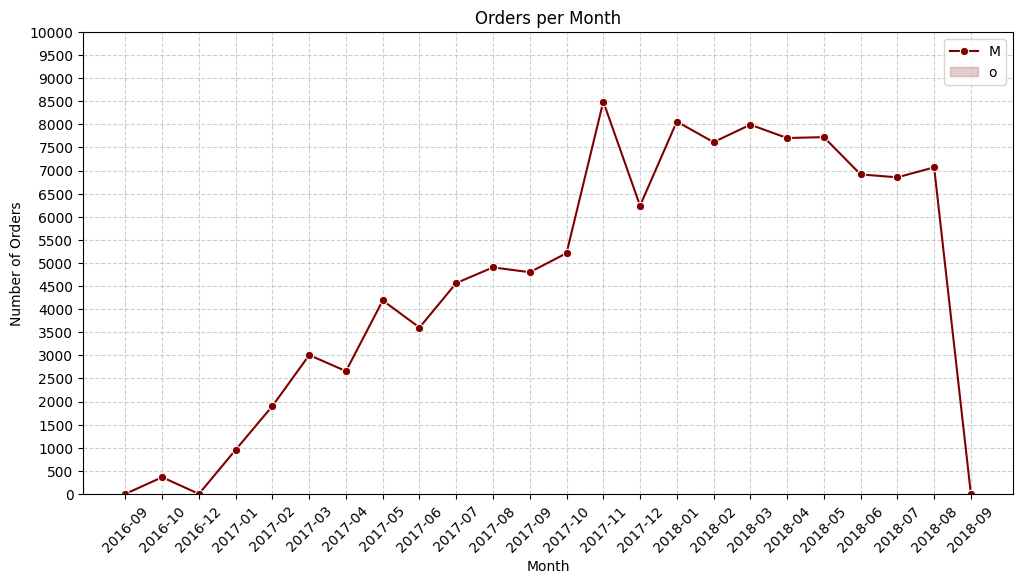

In [163]:
orders_per_month["order_month"] = orders_per_month["order_month"].astype(str)

# Plot in Seaborn
plt.figure(figsize=(12,6))
sns.lineplot(
    data=orders_per_month,
    x="order_month",
    y="order_count",
    marker="o",
    color="maroon"
)

# Beautify the plot
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Orders per Month")
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0, 10000)
plt.yticks(np.arange(0, 10001, 500)) 
plt.legend("Month")

#plt.tight_layout()
plt.show()


4. Is there any seasonality in order volume

In [164]:
Brazil = pd.read_csv('brazil_holidays.csv', parse_dates=['Date'])
Brazil["Date"] = Brazil["Date"].dt.strftime("%m-%d")
Brazil["Holidays"] = True
Brazil.head(10)


,Date,Holiday Name,Type,Holidays
0,01-01,New Year's Day,National Holiday,True
1,01-25,São Paulo Anniversary,Not A Public Holiday,True
2,02-28,Carnival,National Holiday,True
3,03-01,Carnival,National Holiday,True
4,04-15,Good Friday,National Holiday,True
5,04-21,Tiradentes Day,National Holiday,True
6,05-01,Labour Day,National Holiday,True
7,05-08,Mother's Day,Not A Public Holiday,True
8,06-16,Corpus Christi,National Holiday,True
9,07-09,State Rebellion Day,Regional Holiday,True


In [165]:
df_cleaned = df_cleaned.copy()
df_cleaned["purchase_day_month"] = df_cleaned["order_purchase_timestamp"].dt.strftime("%m-%d")
df_cleaned = df_cleaned.merge(Brazil, left_on="purchase_day_month", right_on="Date", how="left")
df_cleaned["Holidays"] = df_cleaned["Holidays"].fillna(False).astype(bool)

C:\Users\Emmanuel Richards\AppData\Local\Temp\ipykernel_25500\3907260913.py:4: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [166]:
df_cleaned["Holidays"].value_counts()

Holidays
False    106087
True       4758
Name: count, dtype: int64

In [167]:
df_cleaned.drop(columns=['Holiday Name', 'Date', "Type" ], inplace=True)

In [168]:
daily_orders = df_cleaned.groupby(["purchase_day_month","Holidays"]).size().reset_index(name='order_count')
daily_mean = daily_orders.groupby("Holidays")["order_count"].mean()
daily_mean

Holidays
False    305.726225
True     264.333333
Name: order_count, dtype: float64

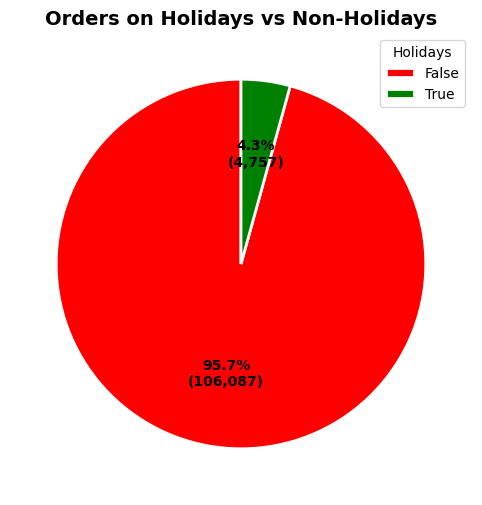

In [169]:
import matplotlib.pyplot as plt

# Aggregate data
avg_orders = daily_orders.groupby("Holidays")["order_count"].sum().reset_index()

# Pie chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    avg_orders["order_count"],
    autopct=lambda p: f"{p:.1f}%\n({int(p*avg_orders['order_count'].sum()/100):,})",
    startangle=90,
    colors=["red", "green"],
    wedgeprops={"edgecolor": "white", "linewidth": 2},
    textprops={"fontsize": 10, "weight": "bold"}
)

# Legend
plt.legend(
    wedges,
    avg_orders["Holidays"],
    title="Holidays",
    loc="best"
)

# Title
plt.title("Orders on Holidays vs Non-Holidays", fontsize=14, weight="bold")


plt.show()


In [170]:
order_index = df_cleaned.set_index("order_purchase_timestamp")
orders_daily = (
    df_cleaned.groupby(df_cleaned["order_purchase_timestamp"].dt.to_period("D"))["order_id"].count().to_timestamp() )
orders_weekly = orders_daily.resample("W").sum()

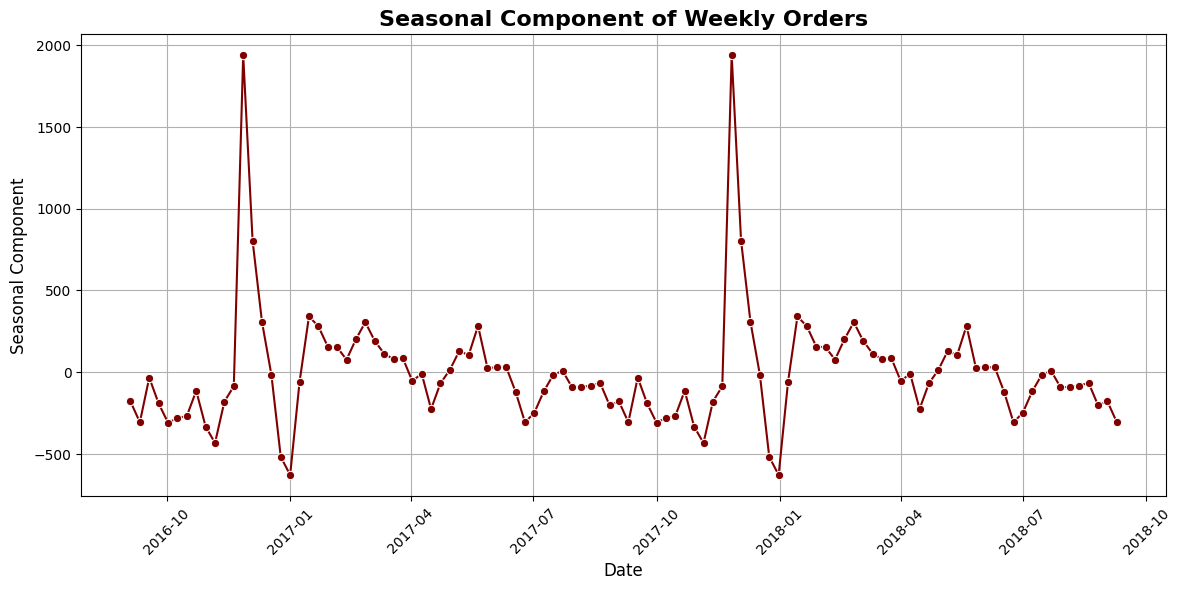

In [171]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Assuming orders_weekly is a pandas Series with DatetimeIndex
decomp = seasonal_decompose(orders_weekly, model='additive', period=52)

# Convert seasonal component to DataFrame for Seaborn
seasonal_df = decomp.seasonal.reset_index()
seasonal_df.columns = ['date', 'seasonal']

# Plot with Seaborn
plt.figure(figsize=(14,6))
sns.lineplot(data=seasonal_df, x='date', y='seasonal', color='maroon', marker='o')
plt.title('Seasonal Component of Weekly Orders', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Seasonal Component', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

5. Analyze One Time and Returning Customers

In [172]:
customer_order_count = df_cleaned.groupby('customer_unique_id')['order_id'].value_counts()
one_time_customers = (customer_order_count == 1).sum()
returning_customers = (customer_order_count > 1).sum()
one_time_customers

np.int64(80578)

In [173]:
returning_customers

np.int64(12069)

In [174]:



# Theme colors
maroon = "#800000"
accent = "#FFD700"   # gold works great with maroon

# Data
customer_data = pd.DataFrame({
    'Customer Type': ['One-time Customers', 'Returning Customers'],
    'Count': [one_time_customers, returning_customers]
})

# Pie chart
fig = go.Figure(data=[go.Pie(
    labels=customer_data['Customer Type'],
    values=customer_data['Count'],
    hole=0.3,  # donut style for modern look
    marker=dict(colors=[maroon, accent], line=dict(color="white", width=2)),
    textinfo='percent',
    textfont=dict(size=14, family="Arial Black", color="white"),
    hoverinfo="label+value+percent"
)])

# Layout styling
fig.update_layout(
    title="One-time vs Returning Customers",
    title_font=dict(size=20, family="Arial Black", color=maroon),
    legend=dict(
        title="Customer Type",
        font=dict(size=12, color=maroon),
        orientation="h",
        y=-0.1,  # move legend below chart
        x=0.5,
        xanchor="center"
    ),
    width=600, height=500,
    margin=dict(l=20, r=20, t=60, b=60),
    paper_bgcolor="white"
)

fig.show()






6. Average product rating by customers

In [175]:
average_rating = df_cleaned.groupby('customer_id')['review_score'].mean().reset_index()
average_rating.rename(columns={'review_score': 'average_rating'}, inplace=True)
average_rating.sort_values("average_rating",ascending=False, inplace=True)
average_rating.head(10)

,customer_id,average_rating
92646,ffffa3172527f765de70084a7e53aae8,5.0
92645,ffff42319e9b2d713724ae527742af25,5.0
92642,fffcb937e9dd47a13f05ecb8290f4d3e,5.0
92626,fff25ab9d3c9ba6ad8119576f285a3d9,5.0
92622,fff168ca1f8a1d2e8e2108b231a68a8c,5.0
92620,ffef8c44b23871ffd6a1df761bd61783,5.0
92619,ffee99041e111172de2006fe9e90202a,5.0
92617,ffed5d4f6245fe13cd57054621eec36a,5.0
92616,ffeac04ef924e20238b3ad2f9cecfbfa,5.0
92614,ffe82abbde8061e75c4c0b72f3b2accf,5.0


In [176]:
overall_rating = df_cleaned.groupby('customer_unique_id')['review_score'].mean()
print(f"Overall average rating per customer: {overall_rating.mean():.2f}")

Overall average rating per customer: 4.08


7. Most Popular products 

In [177]:
import plotly.graph_objects as go

# Prepare data
popular_product = (
    df_cleaned.groupby("product_category_name_english")["order_id"]
    .nunique()
    .reset_index(name="order_count")
    .sort_values("order_count", ascending=False)
)

top10 = popular_product.head(10)

# Theme colors
maroon = "#800000"
accent = "#FFD700"  # gold

# Horizontal bar chart
fig = go.Figure(go.Bar(
    x=top10["order_count"],
    y=top10["product_category_name_english"],
    orientation="h",
    marker=dict(
        color=maroon,
        line=dict(color=accent, width=1.5)
    ),
    text=top10["order_count"],
    textposition="outside",
    textfont=dict(color=maroon, size=12, family="Arial Black")
))

# Layout styling (FIXED title fonts)
fig.update_layout(
    title=dict(
        text="Top 10 Most Popular Products",
        font=dict(size=20, family="Arial Black", color=maroon)
    ),
    xaxis=dict(
        title=dict(
            text="Number of Unique Orders",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black"),
        gridcolor="#f0f0f0"
    ),
    yaxis=dict(
        title=dict(
            text="Product Category",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black"),
        autorange="reversed"  # highest at top
    ),
    width=800, height=500,
    margin=dict(l=150, r=40, t=80, b=60),
    paper_bgcolor="white",
    plot_bgcolor="white",
    showlegend=False
)

fig.show()


8. what is the distribution of payment type

In [178]:
import plotly.graph_objects as go

# Sort payment types by count
payment_distribution = (
    df_cleaned.groupby('payment_type')['order_id']
    .nunique()
    .reset_index(name='payment_count')
    .sort_values('payment_count', ascending=False)
)

# Theme colors
maroon = "#800000"
accent = "#FFD700"  # gold

# Horizontal bar chart
fig = go.Figure(go.Bar(
    x=payment_distribution["payment_count"],
    y=payment_distribution["payment_type"],
    orientation="h",
    marker=dict(
        color=maroon,
        line=dict(color=accent, width=1.2)
    ),
    text=payment_distribution["payment_count"],
    textposition="outside",
    textfont=dict(color=maroon, size=12, family="Arial Black")
))

# Layout styling
fig.update_layout(
    title=dict(
        text="Distribution of Payment Types",
        font=dict(size=20, family="Arial Black", color=maroon)
    ),
    xaxis=dict(
        title=dict(
            text="Number of Unique Orders",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black"),
        gridcolor="#f0f0f0"
    ),
    yaxis=dict(
        title=dict(
            text="Payment Type",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black"),
        autorange="reversed"  # biggest bar on top
    ),
    width=900, height=500,
    margin=dict(l=150, r=40, t=80, b=60),
    paper_bgcolor="white",
    plot_bgcolor="white",
    showlegend=False
)

fig.show()


9. payment type with the highest average payment value 

In [179]:
df_cleaned["order_status"]

0         delivered
1         delivered
2         delivered
3         delivered
4         delivered
            ...    
110840    delivered
110841    delivered
110842    delivered
110843    delivered
110844    delivered
Name: order_status, Length: 110845, dtype: object

In [180]:


# Filter valid orders
valid_orders = df_cleaned[df_cleaned["order_status"].isin(
    ["delivered", "shipped", "processing", "invoiced"]
)]

# Compute average payment value
average_payment_value = (
    valid_orders.groupby('payment_type')['payment_value']
    .mean()
    .reset_index(name="payment_value_count")
    .sort_values('payment_value_count', ascending=False)
)

# Theme colors
maroon = "#800000"
accent = "#FFD700"  # gold

# Horizontal bar chart
fig = go.Figure(go.Bar(
    x=average_payment_value["payment_value_count"],
    y=average_payment_value["payment_type"],
    orientation="h",
    marker=dict(
        color=maroon,
        line=dict(color=accent, width=1.2)
    ),
    text=[f"{v:,.2f}" for v in average_payment_value["payment_value_count"]],
    textposition="outside",
    textfont=dict(color=maroon, size=12, family="Arial Black")
))

# Layout styling
fig.update_layout(
    title=dict(
        text="Average Payment Value by Payment Type",
        font=dict(size=20, family="Arial Black", color=maroon)
    ),
    xaxis=dict(
        title=dict(
            text="Average Payment Value (R$)",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black"),
        gridcolor="#f0f0f0"
    ),
    yaxis=dict(
        title=dict(
            text="Payment Type",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black"),
        autorange="reversed"  # highest avg at top
    ),
    width=970, height=500,
    margin=dict(l=150, r=40, t=80, b=60),
    paper_bgcolor="white",
    plot_bgcolor="white",
    showlegend=False
)

fig.show()


10. How Many customers pay in a single installment vs multiple 

In [181]:
# Single installment customers
single_pay = (
    df_cleaned[df_cleaned["payment_installments"] == 1]
    .groupby("customer_unique_id")["payment_installments"]
    .nunique()
    .reset_index(name="single_payment_count")
    .shape[0]  # number of unique customers
)

# Multi installment customers
multi_pay = (
    df_cleaned[df_cleaned["payment_installments"] > 1]
    .groupby("customer_unique_id")["payment_installments"]
    .nunique()
    .reset_index(name="multi_payment_count")
    .shape[0]  # number of unique customers
)

Customer_pays = pd.DataFrame({
    'Payment Installments': ['Single Installment', 'Multiple Installments'],
    'Number of Customers': [single_pay, multi_pay]
})


In [182]:
fig = go.Figure(go.Bar(
    x=Customer_pays["Payment Installments"],   # now x-axis is categories
    y=Customer_pays["Number of Customers"],    # y-axis is values
    marker=dict(
        color=[maroon, accent],
        line=dict(color="white", width=1.5)
    ),
    text=Customer_pays["Number of Customers"],
    textposition="outside",
    textfont=dict(size=12, family="Arial Black", color="black")
))

# Layout styling
fig.update_layout(
    title=dict(
        text="Customer Payment Installments",
        font=dict(size=20, family="Arial Black", color=maroon)
    ),
    xaxis=dict(
        title=dict(
            text="Payment Installments",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black")
    ),
    yaxis=dict(
        title=dict(
            text="Number of Customers",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black"),
        gridcolor="#f0f0f0"
    ),
    width=700, height=500,
    margin=dict(l=60, r=40, t=80, b=80),
    paper_bgcolor="white",
    plot_bgcolor="white",
    showlegend=False
)

fig.show()


In [183]:
# Step 1: For each customer, find their max installment count
customer_installments = df_cleaned.groupby("customer_unique_id")["payment_installments"].max()

# Step 2: Classify customers
customer_payment_type = customer_installments.apply(lambda x: "Single Installment" if x == 1 else "Multiple Installments")

# Step 3: Count customers
customer_counts = customer_payment_type.value_counts().reset_index()
customer_counts.columns = ["Payment Installments", "Number of Customers"]

print(customer_counts)


    Payment Installments  Number of Customers
0  Multiple Installments                45212
1     Single Installment                44451


What product categories have the highest review scores

In [184]:
cat_review_rating = (df_cleaned.groupby("product_category_name_english")["review_score"].mean().sort_values(ascending=False).head(5))
cat_review_rating


product_category_name_english
cds_dvds_musicals            4.642857
fashion_childrens_clothes    4.500000
books_general_interest       4.414591
books_imported               4.409836
fashion_sport                4.344828
Name: review_score, dtype: float64

In [185]:
import plotly.express as px

# Data (already sorted top 5 categories with avg ratings)
# cat_review_rating should be a Series with index = categories, values = avg rating

fig = px.bar(
    x=cat_review_rating.values,
    y=cat_review_rating.index,
    orientation="h",
    color=cat_review_rating.values,      # color mapped to rating
    color_continuous_scale="RdYlGn",
    text=[f"{v:.2f}" for v in cat_review_rating.values]
)

# Layout styling
fig.update_traces(
    textposition="outside",
    marker=dict(line=dict(color="white", width=1.2))
)

fig.update_layout(
    title=dict(
        text="Top 5 Product Categories by Average Review Rating",
        font=dict(size=20, family="Arial Black", color="#800000")
    ),
    xaxis=dict(
        title=dict(
            text="Average Review Rating",
            font=dict(size=14, color="#800000")
        ),
        tickfont=dict(size=12, color="black"),
        gridcolor="#f0f0f0"
    ),
    yaxis=dict(
        title=dict(
            text="Product Category Name",
            font=dict(size=14, color="#800000")
        ),
        tickfont=dict(size=12, color="black"),
        autorange="reversed"  # highest at top
    ),
    coloraxis_colorbar=dict(
        title=dict(
            text="Average Review Rating",
            font=dict(size=14, color="#800000")
        ),
        tickfont=dict(size=12, color="black")
    ),
    width=850, height=500,
    margin=dict(l=180, r=60, t=80, b=60),
    paper_bgcolor="white",
    plot_bgcolor="white"
)

fig.show()


11. Which products have the longest delivery times

In [186]:
df_cleaned["delivery_day"] = df_cleaned["order_delivered_customer_date"] - df_cleaned["order_purchase_timestamp"]
df_cleaned["delivery_day"] = df_cleaned["delivery_day"].dt.days
category_delivery = df_cleaned.groupby("product_category_name_english")["delivery_day"].mean().sort_values(ascending=False).head(10)
category_delivery

product_category_name_english
office_furniture                     19.198034
christmas_supplies                   15.380000
security_and_services                15.000000
furniture_mattress_and_upholstery    15.000000
fashion_shoes                        14.809524
home_comfort_2                       13.806452
garden_tools                         13.254975
home_confort                         13.090090
fashion_underwear_beach              13.078571
consoles_games                       12.914260
Name: delivery_day, dtype: float64

In [187]:
import plotly.express as px

fig = px.bar(
    x=category_delivery.values,
    y=category_delivery.index,
    orientation="h",
    color=category_delivery.values,          # color mapped to values
    color_continuous_scale="RdYlGn_r",       # valid continuous scale
    text=[f"{v:.2f}" for v in category_delivery.values]
)

# Layout styling
fig.update_traces(
    textposition="outside",
    marker=dict(line=dict(color="white", width=1.2))
)

fig.update_layout(
    title=dict(
        text="Top 10 Product Categories by Average Delivery in Days",
        font=dict(size=20, family="Arial Black", color="#800000")
    ),
    xaxis=dict(
        title=dict(
            text="Delivery Days",
            font=dict(size=14, color="#800000")
        ),
        range=[0, 20],  # force x-axis from 0 to 20
        tick0=0,
        dtick=2,
        tickfont=dict(size=12, color="black"),
        gridcolor="#f0f0f0"
    ),
    yaxis=dict(
        title=dict(
            text="Product Category Name",
            font=dict(size=14, color="#800000")
        ),
        tickfont=dict(size=12, color="black"),
        autorange="reversed"  # highest category on top
    ),
    coloraxis_colorbar=dict(
        title=dict(
            text="Average Delivery Days",
            font=dict(size=14, color="#800000")
        ),
        tickfont=dict(size=12, color="black")
    ),
    width=950, height=500,
    margin=dict(l=180, r=60, t=80, b=60),
    paper_bgcolor="white",
    plot_bgcolor="white"
)

fig.show()


12. What is the average product price and freight cost per category

In [188]:
avg_freight_price = df_cleaned.groupby("product_category_name_english")[["price", "freight_value"]].mean()
avg_freight_price.rename(columns={"price": "average_price", "freight_value": "average_freight_cost"}, inplace=True)
avg_freight_price = avg_freight_price.sort_values(by = "average_price",ascending=False)
avg_freight_price.head(30)

,average_price,average_freight_cost
product_category_name_english,,
computers,1234.644054,30.161351
agro_industry_and_commerce,257.794505,20.880385
fixed_telephony,211.222820,16.794737
watches_gifts,191.204582,16.315379
musical_instruments,168.109366,18.504760
construction_tools_safety,167.177460,18.593175
furniture_mattress_and_upholstery,149.954545,27.720000
small_appliances,145.109520,17.898419
security_and_services,141.645000,20.610000


In [189]:


# Take top 10 categories
top10 = avg_freight_price.head(10)

maroon = "#800000"
blue = "#4682B4"

fig = go.Figure()

# Average Price bars
fig.add_trace(go.Bar(
    x=top10["average_price"],
    y=top10.index,
    name="Average Price",
    orientation="h",
    marker=dict(color=maroon),
    text=[f"{v:.2f}" for v in top10["average_price"]],
    textposition="outside"
))

# Average Freight Cost bars
fig.add_trace(go.Bar(
    x=top10["average_freight_cost"],
    y=top10.index,
    name="Average Freight Cost",
    orientation="h",
    marker=dict(color=blue),
    text=[f"{v:.2f}" for v in top10["average_freight_cost"]],
    textposition="outside"
))

# Layout styling
fig.update_layout(
    title=dict(
        text="Average Product Price and Freight Cost per Category",
        font=dict(size=20, family="Arial Black", color=maroon)
    ),
    barmode="group",  # grouped bars
    xaxis=dict(
        title=dict(
            text="Price and Freight Cost (R$)",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black"),
        gridcolor="#f0f0f0"
    ),
    yaxis=dict(
        title=dict(
            text="Categories",
            font=dict(size=14, color=maroon)
        ),
        tickfont=dict(size=12, color="black"),
        autorange="reversed"  # highest on top
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom", y=1.02,
        xanchor="center", x=0.5,
        font=dict(size=12)
    ),
    width=980, height=550,
    margin=dict(l=180, r=60, t=80, b=60),
    paper_bgcolor="white",
    plot_bgcolor="white"
)

fig.show()


13. Which product categories have the highest return or low ratings

In [190]:
category_reviews = df_cleaned.groupby('product_category_name_english')['review_score'].mean().sort_values()

print(category_reviews.head(5)) 


product_category_name_english
security_and_services                2.500000
diapers_and_hygiene                  3.256410
furniture_mattress_and_upholstery    3.272727
home_comfort_2                       3.290323
furniture_bedroom                    3.450000
Name: review_score, dtype: float64


In [191]:
import plotly.graph_objects as go
import seaborn as sns

# Take bottom 5 categories by review score
data = category_reviews.head(5).reset_index().sort_values("review_score")

maroon = "#800000"

# Get Seaborn's Mako palette with enough shades
mako_colors = sns.color_palette("mako", n_colors=len(data)).as_hex()

fig = go.Figure()

# Bar chart
fig.add_trace(go.Bar(
    x=data["review_score"],
    y=data["product_category_name_english"],
    orientation="h",
    marker=dict(
        color=data["review_score"],
        colorscale=[[i/(len(mako_colors)-1), c] for i, c in enumerate(mako_colors)],  # convert to Plotly format
        line=dict(color="white", width=1.2),
        showscale=True
    ),
    text=[f"{v:.2f}" for v in data["review_score"]],
    textposition="outside",
    textfont=dict(size=12, color="black", family="Arial Black"),
    name="Average Rating"
))

# Layout
fig.update_layout(
    title=dict(
        text="🚨 Bottom 5 Product Categories by Customer Rating",
        font=dict(size=20, family="Arial Black", color=maroon)
    ),
    xaxis=dict(
        title=dict(text="Average Rating", font=dict(size=14, color=maroon)),
        tickfont=dict(size=12, color="black"),
        gridcolor="#f0f0f0"
    ),
    yaxis=dict(
        title=dict(text="Product Category", font=dict(size=14, color=maroon)),
        tickfont=dict(size=12, color="black"),
        autorange="reversed"
    ),
    width=950, height=500,
    margin=dict(l=200, r=80, t=80, b=60),
    paper_bgcolor="white",
    plot_bgcolor="white",
    showlegend=False
)

fig.show()


14. What's the trend of review scores over time

In [192]:
df_cleaned["review_creation_date"] = pd.to_datetime(df_cleaned["review_creation_date"], errors='coerce')
df_cleaned["review_creation_month"] = df_cleaned["review_creation_date"].dt.to_period("M")
trends = df_cleaned.groupby("review_creation_month")["review_score"].mean()
trends.index = trends.index.to_timestamp()
trends.reset_index()

,review_creation_month,review_score
0,2016-10-01,4.024631
1,2016-11-01,3.495575
2,2016-12-01,2.200000
3,2017-01-01,4.277580
4,2017-02-01,4.275235
5,2017-03-01,4.094394
6,2017-04-01,4.036290
7,2017-05-01,4.069281
8,2017-06-01,4.119376
9,2017-07-01,4.135619


In [193]:

import plotly.express as px
# Assuming `trends` is a Pandas Series with datetime index and numeric values
fig = px.line(
    x=trends.index,
    y=trends.values,
    markers=True,  # adds markers
    labels={"x": "Date", "y": "Average Review Score"},
    title="Trend of Review Scores Over Time"
)

# Customize hover tooltips
fig.update_traces(
    line=dict(color="royalblue", width=2.5),
    marker=dict(color="darkorange", size=9, line=dict(color="black", width=1)),
    hovertemplate="<b>Date:</b> %{x}<br><b>Score:</b> %{y:.2f}<extra></extra>"
)

# Layout styling
fig.update_layout(
    title=dict(font=dict(size=18, color="black")),
    xaxis=dict(title="Date", tickangle=45),
    yaxis=dict(title="Average Review Score"),
    template="plotly_white",
    legend=dict(title="Legend", orientation="h", y=-0.2, x=0.5, xanchor="center")
)

fig.show()


In [194]:
target_cities = ["sao paulo", "porto alegre", "curitiba", "fortaleza", "belo horizonte", "salvador"]
target_city = df_cleaned[df_cleaned["customer_city"].str.lower().isin(target_cities)]

Geospacial Analysis

average review score per city

C:\Users\Emmanuel Richards\AppData\Local\Temp\ipykernel_25500\1418952601.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




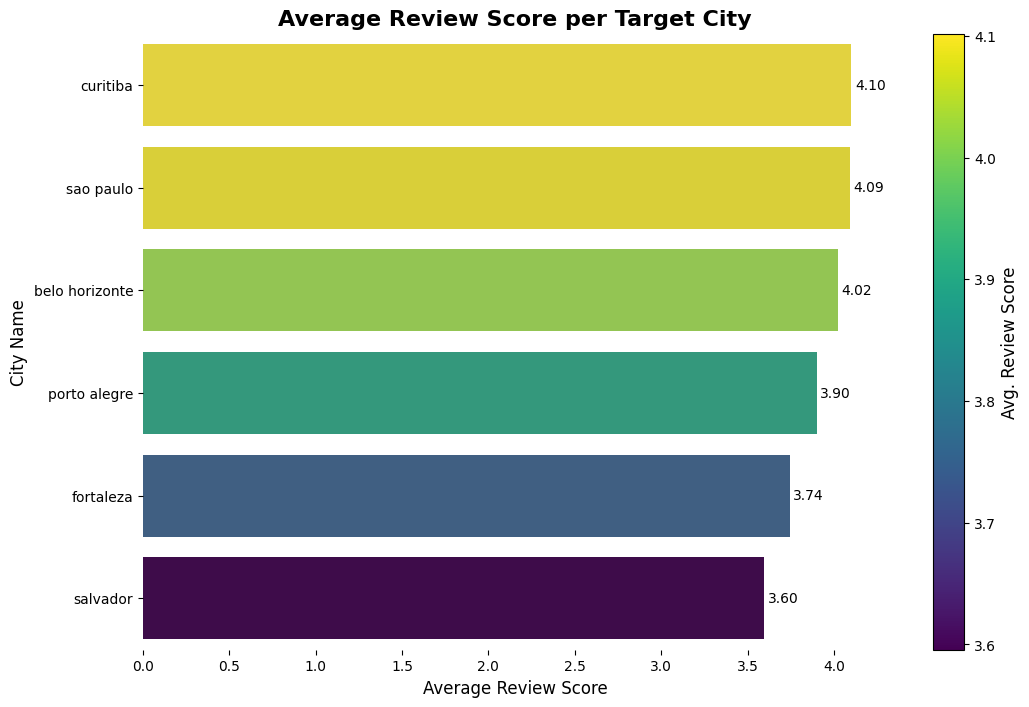

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Group and sort
target_city_average_rating = (
    target_city.groupby("customer_city")["review_score"]
    .mean()
    .sort_values(ascending=False)
)

# Convert to DataFrame for seaborn
target_city_df = target_city_average_rating.reset_index()
target_city_df.columns = ["customer_city", "avg_review_score"]

# Normalize values for colormap
norm = mpl.colors.Normalize(
    vmin=target_city_df["avg_review_score"].min(),
    vmax=target_city_df["avg_review_score"].max()
)
cmap = plt.cm.viridis

# Map each bar color to score
colors = [cmap(norm(v)) for v in target_city_df["avg_review_score"]]

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=target_city_df,
    y="customer_city",
    x="avg_review_score",
    palette=colors
)

# Add value labels on bars
for i, v in enumerate(target_city_df["avg_review_score"]):
    ax.text(v + 0.02, i, f"{v:.2f}", va="center")

# Styling
plt.title("Average Review Score per Target City", fontsize=16, weight="bold")
plt.xlabel("Average Review Score", fontsize=12)
plt.ylabel("City Name", fontsize=12)
sns.despine(left=True, bottom=True)

# Add colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Avg. Review Score", fontsize=12)

plt.show()


Number of Orders per City

C:\Users\Emmanuel Richards\AppData\Local\Temp\ipykernel_25500\1261286203.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




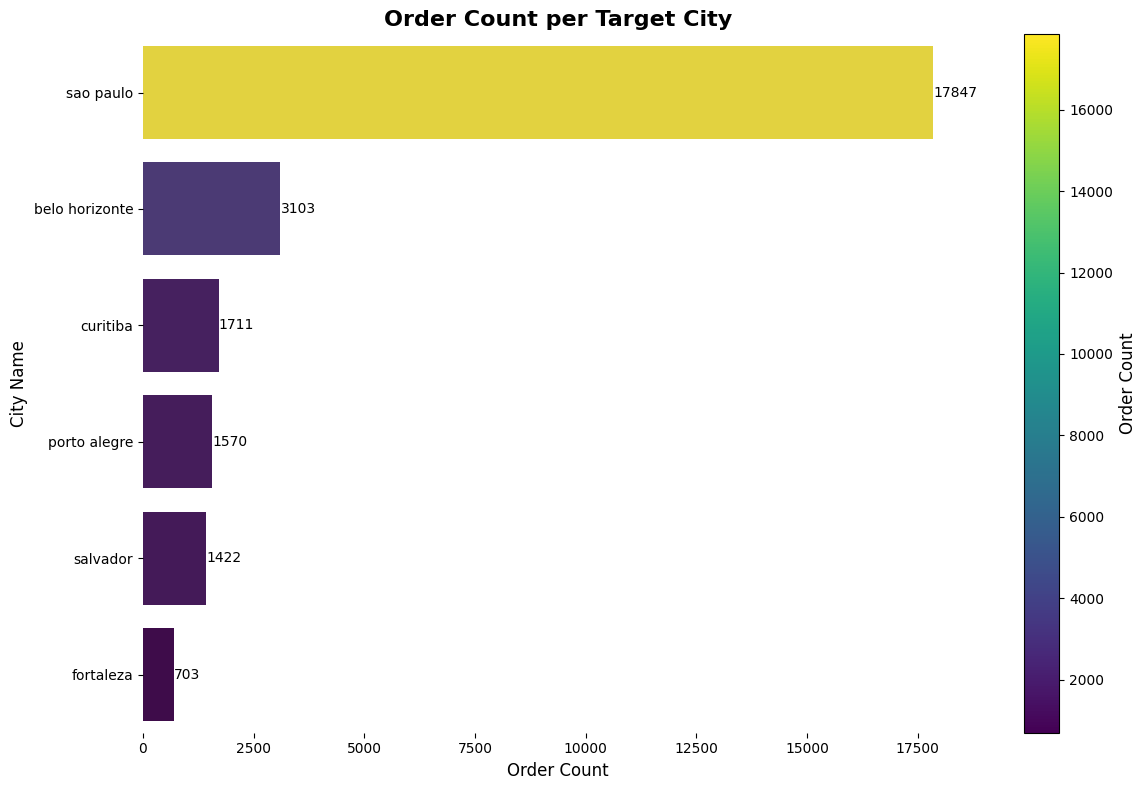

In [196]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Count orders per city
city_orders = target_city["customer_city"].value_counts()

# Convert Series → DataFrame
city_orders_df = city_orders.reset_index()
city_orders_df.columns = ["customer_city", "order_count"]

# Normalize values for colormap
norm = mpl.colors.Normalize(
    vmin=city_orders_df["order_count"].min(),
    vmax=city_orders_df["order_count"].max()
)
cmap = plt.cm.viridis   # Matplotlib colormap (you can try 'plasma', 'cividis', etc.)

# Map each order count to a color
colors = [cmap(norm(v)) for v in city_orders_df["order_count"]]

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=city_orders_df,
    y="customer_city",
    x="order_count",
    palette=colors
)

# Add value labels on bars
for i, v in enumerate(city_orders_df["order_count"]):
    ax.text(v + 5, i, str(v), va="center", fontsize=10)

# Titles & labels
plt.title("Order Count per Target City", fontsize=16, weight="bold")
plt.xlabel("Order Count", fontsize=12)
plt.ylabel("City Name", fontsize=12)

# Add colorbar to show magnitude
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Order Count", fontsize=12)

# Clean up look
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Average delivery time per city

In [197]:
import plotly.express as px

# Calculate average delivery time per city
avg_delivery = target_city.groupby("customer_city")["delivery_day"].mean().sort_values(ascending=False)

# Convert Series → DataFrame
avg_delivery_df = avg_delivery.reset_index()
avg_delivery_df.columns = ["customer_city", "avg_delivery_days"]

# Keep top 10 cities
avg_delivery_df = avg_delivery_df.head(10)

# Define primary and secondary colors
primary_color = "#800000"  # Maroon
secondary_color = "#FFD700"  # Gold (contrasts well with maroon)

# Create Plotly Bar Chart
fig = px.bar(
    avg_delivery_df,
    x="avg_delivery_days",
    y="customer_city",
    orientation="h",
    text="avg_delivery_days",
    color_discrete_sequence=[primary_color],  # consistent maroon color
)

# Update layout for professional look
fig.update_traces(
    texttemplate="%{text:.1f} days",
    textposition="outside",
    marker=dict(
        line=dict(color=secondary_color, width=1.5)  # secondary accent on bar edges
    ),
)

fig.update_layout(
    title=dict(
        text="Average Delivery Time per Target City (Top 10)",
        x=0.5,
        xanchor="center",
        font=dict(size=20, family="Arial Black"),
    ),
    xaxis=dict(
        title="Average Delivery Time (Days)",
        showgrid=True,
        gridcolor="lightgray",
    ),
    yaxis=dict(
        title="City Name",
        categoryorder="total ascending",
    ),
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    plot_bgcolor="white",
)

fig.show()


Average Freight & Price per City

In [198]:
import plotly.express as px

# Compute averages per city
avg_pandf = target_city.groupby("customer_city")[["freight_value", "price"]].mean()

# Convert to DataFrame
avg_pandf_df = avg_pandf.sort_values("price", ascending=False).head(10).reset_index()

# Melt into long format
avg_pandf_melted = avg_pandf_df.melt(
    id_vars="customer_city", 
    value_vars=["freight_value", "price"], 
    var_name="Metric", 
    value_name="Average Value"
)

# Define colors
colors = {
    "price": "#800000",  # Maroon
    "freight_value": "#FFD700"           # Gold
}

# Create grouped bar chart
fig = px.bar(
    avg_pandf_melted,
    x="Average Value",
    y="customer_city",
    color="Metric",
    orientation="h",
    text="Average Value",
    color_discrete_map=colors
)

# Update bar traces
fig.update_traces(
    texttemplate="R$ %{text:.0f}",
    textposition="outside"
)

# Layout refinements
fig.update_layout(
    title=dict(
        text="Average Freight Value and Price per Target City (Top 10)",
        x=0.5,
        xanchor="center",
        font=dict(size=20, family="Arial Black")
    ),
    xaxis=dict(
        title="Average Value (R$)",
        showgrid=True,
        gridcolor="lightgray"
    ),
    yaxis=dict(
        title="City Name",
        categoryorder="total ascending"
    ),
    legend=dict(
        title="Metric",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    plot_bgcolor="white"
)

fig.show()


Machine Learning and Modelling for predicting if a customer will make another purchase

customer_id, order_id,
order_status ,
order_purchase_timestamp

In [199]:
olist = df_cleaned[["customer_unique_id","order_id","order_status","order_purchase_timestamp"]]

In [200]:
#sorting my  values by order_purchase_timestamp
olist = olist.sort_values('order_purchase_timestamp')
#counting purchase by customer
purchase_count = olist.groupby("customer_unique_id")["order_id"].count()
#my repeat customers 
repeat_customer = purchase_count.apply(lambda x : 1 if x > 1 else 0 )
olist = olist.merge(repeat_customer.rename("target"), on = "customer_unique_id")

In [201]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110845 entries, 0 to 110844
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_unique_id        110845 non-null  object        
 1   order_id                  110845 non-null  object        
 2   order_status              110845 non-null  object        
 3   order_purchase_timestamp  110845 non-null  datetime64[ns]
 4   target                    110845 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.2+ MB


In [202]:
olist["purchase_hour"] = olist["order_purchase_timestamp"].dt.hour
olist["purchase_day"] = olist["order_purchase_timestamp"].dt.day_of_week
olist["purchase_month"] = olist["order_purchase_timestamp"].dt.month

olist["order_status_encoded"] = olist["order_status"].astype("category").cat.codes

In [203]:

features = (
    olist.groupby("customer_unique_id")
         .agg({
             "purchase_hour": "mean",
             "purchase_day": "mean",
             "purchase_month": "mean",
            "order_status_encoded": "mean"})
         .reset_index())




In [204]:
feature = features.merge(olist[["customer_unique_id","target"]], on= "customer_unique_id")

In [205]:
feature.head()

,customer_unique_id,purchase_hour,purchase_day,purchase_month,order_status_encoded,target
0,0000366f3b9a7992bf8c76cfdf3221e2,10.0,3.0,5.0,2.0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,11.0,0.0,5.0,2.0,0
2,0000f46a3911fa3c0805444483337064,21.0,4.0,3.0,2.0,0
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,3.0,10.0,2.0,0
4,0004aac84e0df4da2b147fca70cf8255,19.0,1.0,11.0,2.0,0


In [206]:
x = feature.drop(["customer_unique_id", "target"], axis= 1)
y = feature["target"]

In [207]:
x.head()

,purchase_hour,purchase_day,purchase_month,order_status_encoded
0,10.0,3.0,5.0,2.0
1,11.0,0.0,5.0,2.0
2,21.0,4.0,3.0,2.0
3,20.0,3.0,10.0,2.0
4,19.0,1.0,11.0,2.0


In [208]:
import joblib
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [209]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

In [210]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [211]:
log_reg = LogisticRegression(class_weight="balanced", random_state=42 )
log_reg.fit(x_train_scaled , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [212]:
y_predict = log_reg.predict(x_test_scaled)
conf_metric = sm.confusion_matrix(y_test, y_predict)
accuracy_score = sm.accuracy_score(y_test , y_predict)
precision_score = sm.precision_score(y_test , y_predict)
recall_score =  sm.recall_score(y_test, y_predict)
f1_score = sm.f1_score(y_test , y_predict)
classf_report = sm.classification_report(y_test , y_predict)

In [213]:
print(f"Accuracy: {accuracy_score:.2f}")
print(f"Precision: {precision_score:.2f}")
print(f"Recall: {recall_score:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print("Classification Report:")
print(sm.classification_report(y_test, y_predict))

Accuracy: 0.49
Precision: 0.32
Recall: 0.55
F1-Score: 0.41
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.46      0.56     15203
           1       0.32      0.55      0.41      6966

    accuracy                           0.49     22169
   macro avg       0.51      0.51      0.48     22169
weighted avg       0.58      0.49      0.51     22169



Confusion Matrix:
[[7066 8137]
 [3123 3843]]


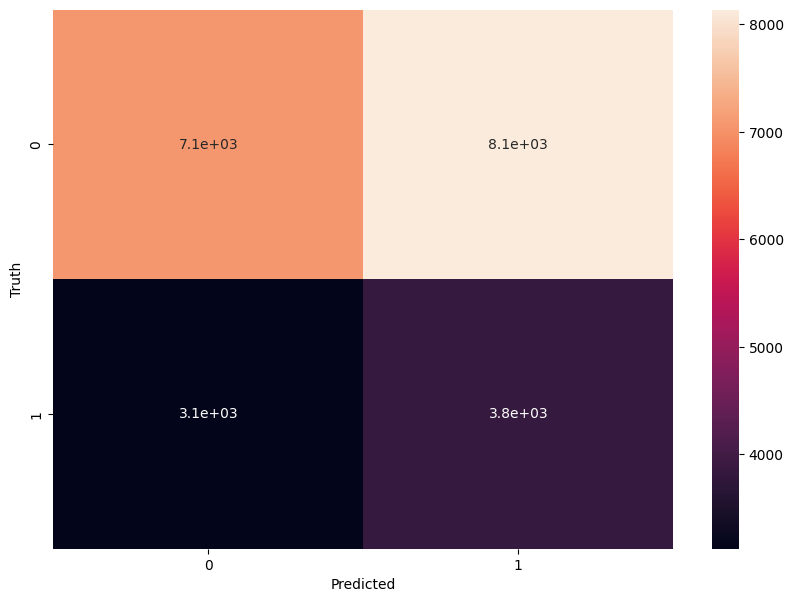

In [214]:
print("Confusion Matrix:")
print(conf_metric)
plt.figure(figsize = (10,7))
sns.heatmap(conf_metric, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Using the Random Forest Model

In [215]:
from sklearn.model_selection import cross_val_score

In [216]:
rf = RandomForestClassifier(n_estimators=100 , max_depth=5 , random_state=42, n_jobs=1, class_weight="balanced")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [217]:

rf.fit(x_train, y_train)

# Predict
y_pred_rf = rf.predict(x_test)

conf_metric_rf = sm.confusion_matrix(y_test, y_pred_rf)
accuracy_score_rf = sm.accuracy_score(y_test , y_pred_rf)
precision_score_rf = sm.precision_score(y_test , y_pred_rf)
recall_score_rf =  sm.recall_score(y_test, y_pred_rf)
f1_score_rf = sm.f1_score(y_test , y_pred_rf)
classf_report_rf = sm.classification_report(y_test , y_pred_rf)

In [218]:
print(f"Accuracy: {accuracy_score_rf:.2f}")
print(f"Precision: {precision_score_rf:.2f}")
print(f"Recall: {recall_score_rf:.2f}")
print(f"F1-Score: {f1_score_rf:.2f}")
print("Classification Report:")
print(sm.classification_report(y_test, y_pred_rf))

Accuracy: 0.54
Precision: 0.35
Recall: 0.55
F1-Score: 0.43
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.62     15203
           1       0.35      0.55      0.43      6966

    accuracy                           0.54     22169
   macro avg       0.54      0.54      0.52     22169
weighted avg       0.61      0.54      0.56     22169



Confusion Matrix:
[[8221 6982]
 [3148 3818]]


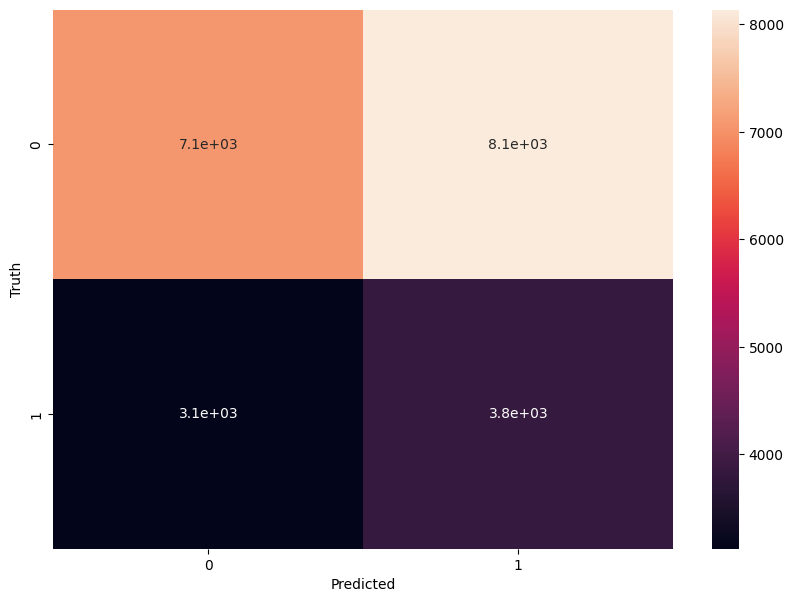

In [219]:
print("Confusion Matrix:")
print(conf_metric_rf)
plt.figure(figsize = (10,7))
sns.heatmap(conf_metric, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [235]:


#Calculate scale_pos_weight
neg, pos = np.bincount(y_train)   # counts of 0s and 1s in training
scale_pos_weight = neg / pos

# Train XGBoost with imbalance handling
xg = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    learning_rate=0.05,
    n_estimators=500,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss",

)

xg.fit(x_train, y_train)

# Predictions
y_proba = xg.predict_proba(x_test)[:,1]
y_pred_xg = (y_proba >= 0.44).astype(int)



In [236]:

conf_metric_xg = sm.confusion_matrix(y_test, y_pred_xg)
accuracy_score_xg = sm.accuracy_score(y_test , y_pred_xg)
precision_score_xg= sm.precision_score(y_test , y_pred_xg)
recall_score_xg =  sm.recall_score(y_test, y_pred_xg)
f1_score_xg = sm.f1_score(y_test , y_pred_xg)
classf_report_xg = sm.classification_report(y_test , y_pred_xg)

In [237]:
print(f"Accuracy: {accuracy_score_xg:.2f}")
print(f"Precision: {precision_score_xg:.2f}")
print(f"Recall: {recall_score_xg:.2f}")
print(f"F1-Score: {f1_score_xg:.2f}")
print("Classification Report:")
print(sm.classification_report(y_test, y_pred_xg))

Accuracy: 0.46
Precision: 0.35
Recall: 0.79
F1-Score: 0.48
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.31      0.45     15203
           1       0.35      0.79      0.48      6966

    accuracy                           0.46     22169
   macro avg       0.56      0.55      0.46     22169
weighted avg       0.64      0.46      0.46     22169



Confusion Matrix:
[[ 4765 10438]
 [ 1433  5533]]


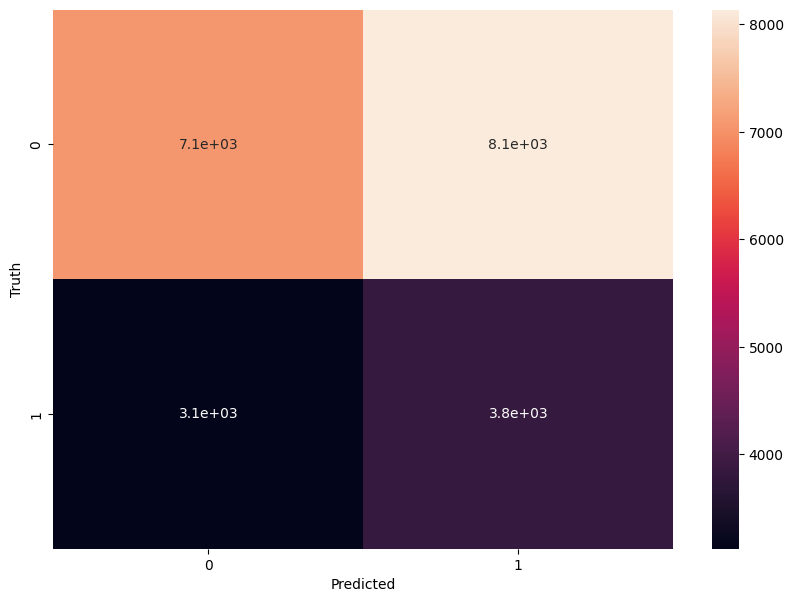

In [238]:
print("Confusion Matrix:")
print(conf_metric_xg)
plt.figure(figsize = (10,7))
sns.heatmap(conf_metric, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

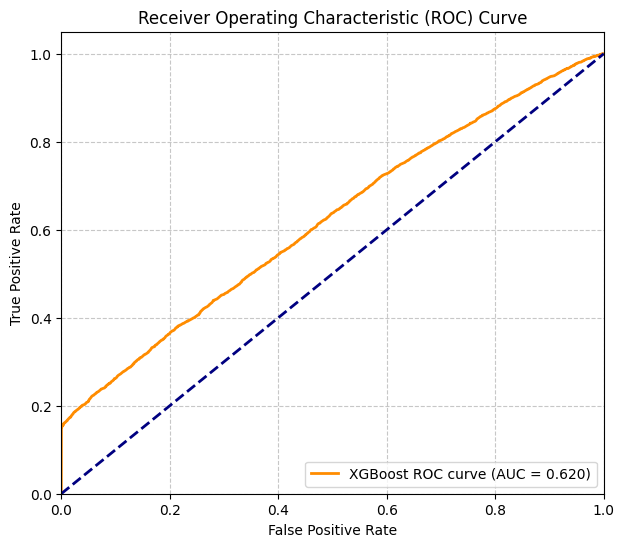

In [240]:

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, 
         label=f"XGBoost ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [225]:
import pickle

# Save XGBoost model
with open('XGBoost.pkl', 'wb') as f:
    pickle.dump(xg, f)

#with open('random_forest_model.pkl', 'rb') as f:
   #  loaded_rf = pickle.load(f)
